### General training pipeline in pytorch:
1) Design model (input, output size, forward pass )

2) Construct loss and optimizer

3) Training loop:

    - Forward pass: Compute prediction
    
    - Backward pass: Gradients
    
    - Update weights

In [11]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [12]:
# 0) Prepare data
# Generating a regression dataset...
X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 1)

# We want to convert this to a torch tensor...

In [13]:
X = torch.from_numpy(X_numpy.astype(np.float32)) # it was double before...
y = torch.from_numpy(y_numpy.astype(np.float32))

In [14]:
# Reshaping Y tensor.....right now its a single row and we want to make it a column vector
print(y.shape)
print(y.size())

print(y.view(y.shape[0], 1))

y = y.view(y.shape[0], 1)

torch.Size([100])
torch.Size([100])
tensor([[-5.5539e+01],
        [-1.0662e+01],
        [ 2.2757e+01],
        [ 1.0110e+02],
        [ 1.4434e+02],
        [ 3.3289e+01],
        [ 3.3015e+01],
        [-2.5887e+01],
        [-9.9639e+01],
        [ 2.3803e+01],
        [-4.5589e+01],
        [-8.3388e+00],
        [-9.5315e+01],
        [ 3.6407e+01],
        [-8.7293e+01],
        [ 6.7669e+01],
        [-1.3687e+01],
        [-5.5441e+01],
        [-6.5340e+01],
        [-5.4450e+01],
        [-2.8835e+01],
        [ 1.7884e+02],
        [ 6.5084e+01],
        [ 2.6668e+01],
        [-1.8546e+01],
        [-4.1499e+01],
        [ 8.5583e-01],
        [ 4.4562e+01],
        [ 1.1598e+02],
        [-6.4620e+01],
        [-2.5931e+01],
        [-6.0882e+01],
        [ 1.8720e+01],
        [ 7.5070e+01],
        [ 1.1720e+02],
        [-2.2698e+01],
        [-5.6363e+01],
        [ 1.8084e+02],
        [-1.9257e+02],
        [ 6.8503e+01],
        [ 1.6552e+02],
        [ 1.0500e+02]

In [24]:
X

tensor([[-0.6118],
        [-0.2494],
        [ 0.4885],
        [ 0.7620],
        [ 1.5198],
        [ 0.3776],
        [ 0.5129],
        [-0.6712],
        [-1.3965],
        [ 0.3156],
        [-0.6370],
        [-0.3968],
        [-1.1006],
        [ 0.9009],
        [-1.0999],
        [ 0.8280],
        [-0.0756],
        [-0.3522],
        [-0.6707],
        [-1.0730],
        [-0.3062],
        [ 2.1856],
        [ 0.8654],
        [ 0.1983],
        [-0.3841],
        [-0.6837],
        [ 0.0508],
        [ 0.5828],
        [ 1.2529],
        [-0.7544],
        [-0.3493],
        [-0.8876],
        [ 0.1866],
        [ 0.8762],
        [ 0.8390],
        [-0.5045],
        [-0.3439],
        [ 1.6925],
        [-2.3015],
        [ 0.9311],
        [ 2.1003],
        [ 1.4621],
        [-0.8452],
        [-0.8779],
        [-0.3224],
        [ 0.8851],
        [ 0.1600],
        [ 1.1316],
        [-0.3753],
        [ 0.5025],
        [-0.2089],
        [ 0.1202],
        [ 0.

In [15]:
y.shape

torch.Size([100, 1])

In [16]:
X.shape

torch.Size([100, 1])

In [17]:
n_samples, n_features = X.shape

## 1) Design model

In [18]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

## 2) Loss and optimizer

In [19]:
learning_rate = 0.01

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

## 3) Training loop

In [22]:
num_epochs = 100
for epoch in range(num_epochs):
    
    # Forward pass and loss  
    y_predicted = model(X)
    
    loss = criterion(y_predicted, y)
    
    # Backward pass
    loss.backward()
    
    # Update weights
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4197.7427
epoch: 20, loss = 3134.7175
epoch: 30, loss = 2365.9243
epoch: 40, loss = 1809.3102
epoch: 50, loss = 1405.9045
epoch: 60, loss = 1113.2607
epoch: 70, loss = 900.7825
epoch: 80, loss = 746.3848
epoch: 90, loss = 634.1085
epoch: 100, loss = 552.4070


## Plot

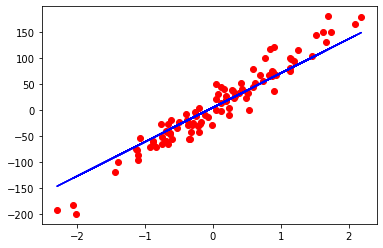

In [23]:
# remove from the computational graph and convert to numpy
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')

plt.plot(X_numpy, predicted, 'b')

plt.show()

---